# Kaj Meijer, 10509534

# Lotte Philippus, 11291168

In [1]:
import math
import numpy as np
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt

# De loterij

In de bijlage `Risk_Q.pdf` vind je een lijst met keuzes tussen twee loterijen, zoals in het figuur hieronder. Voor elke loterij zijn er telkens twee mogelijke uitkomsten, aan jou de vraag welke loterij je zou kiezen als je er een moet uitkiezen. Kijk goed naar de uitkomsten en kansen en vink aan welke loterij je kiest.

![](loterij.png)


Als je alle keuzes gemaakt hebt, maak dan een tab delimited .txt bestand met de volgende structuur:

    p1,o1,p2,o2: p's and o's of gamble 1  (p is probability, o is outcome)
    p3,o3,p4,o4: p's and o's of gamble 2 
    decision: choice (1 = gamble 1, 2 = gamble 2)

![](example_data.png)

## Q1 (5 pts)

In het voorbeeld zie je de header en daaronder een regel met de loterij en keuze van figuur 1. Maak een zelfde soort txt file met op elke rij de kansen, uitkomsten en de keuze die je voor die loterij hebt gemaakt. Deze file gebruiken we later om een simpel model te fitten. Sla de file op als `studentnummer_data.txt` (als er in groep van twee gewerkt wordt dan dus twee files).

Zie de bestanden 10509534_data.txt en 11291168_data.txt.

# Prospect Theory

Prospect theory, ook wel cumulative prospect therory (CPT), is een theorie die beschrijft hoe mensen uitkomsten en waarschijnlijkheden wegen en tot een beslissing komen. Het gebruikt hiervoor een combinatie van vier verschillende functies:

1. Een functie die objectieve uitkomsten transformeert naar subjectieve waarde (V1)
2. Een functie die waarschijnlijkheid transformeert naar subjectieve waarschijnlijkheid (W1)
3. Een functie die subjectieve waarden en waarschijnlijkheden van een optie integreert tot een subjectieve verwachte waarde (EV)
4. Een beslis regel die uitrekent met welke waarschijnlijkheid een van twee opties word gekozen (Softmax)

## Q2 (15 pts)

Schrijf voor elke van deze 4 functies een functie in Python. Geef bij elke functie aan welke vrije variabelen deze heeft en wat die betekenen.


In [17]:
def v(o, alpha):
    return o**alpha

def w(p, delta, gamma):
    return (delta * p**gamma)/(delta * p**gamma + (1-p)**gamma)

def ev(p1, o1, p2, o2, delta, gamma, alpha):
    return w(p1, delta, gamma) * v(o1, alpha) + w(p2, delta, gamma) * v(o2, alpha) 
    
def softmax(p1, o1, p2, o2, p3, o3, p4, o4, delta, gamma, alpha):
    
    top = math.exp(ev(p1, o1, p2, o2, delta, gamma, alpha))
    bottom = top + math.exp(subjective_expected_probability(p3, o3, p4, o4, delta, gamma, alpha))
    
    # first softmax
    a = top/bottom
    
    top = math.exp(ev(p3, o3, p4, o4, delta, gamma, alpha))
    bottom = top + math.exp(ev(p1, o1, p2, o2, delta, gamma, alpha))
    
    # second softmax
    b = top/bottom
    
    # make the decision
    if a > b:
        return a, 1
    else:
        return b, 2

## Q3 (10 pts)

Plot de waarde functie *(1)* voor objectieve waardes tussen 0 en 1000, gebruik makende van verschillende waarden van $\alpha$, en label deze lijnen voor:

$$\alpha \in \{0.5, 0.9, 1.3, 1.7\}$$

*Hint:* Gebruik [vectorize](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html) om een bestaande functie op een gehele [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) tegelijk te kunnen toepassen, en zo alle subjectieve waardes in 1 keer uit te rekenen.

De meeste mensen zijn risicomijdend, waar ligt dus voor de meeste mensen de waarde van $\alpha$? 

Voor de meeste mensen ligt de waarde van $\alpha$ onder de 1.

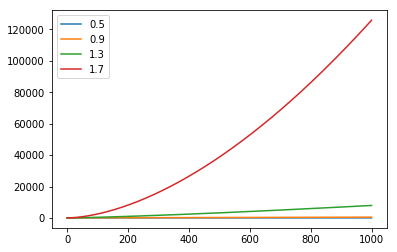

In [30]:
os = np.linspace(0,1000, 1000)
ass = np.array([0.5, 0.9, 1.3, 1.7])
vec_v = np.vectorize(v)

for a in ass:
    plt.plot(os, vec_v(os, a), label=a)
plt.legend()
plt.show()

## Q4 (5 pts)

Plot de waarde functie *(1)* voor objectieve waardes tussen 0 en -1000, gebruik makende van verschillende waarden van $\beta$ en $\lambda$, en label deze lijnen voor:

$$\beta \in \{0.5, 0.9\}$$
$$\lambda \in \{0.5, 1.5\}$$

De meeste mensen vinden verliezen van 10 euro relatief erger dan dat ze blij zijn met het winnen van 10 euro, waar ligt dus voor de meeste mensen de waarde van $\lambda$?  

In [38]:
def vl(o, beta, labda):
    return -labda * math.pow(-o,beta)

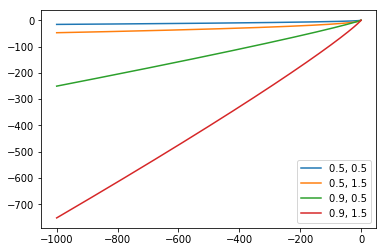

In [41]:
os = np.linspace(0,-1000, 1000)
bs = np.array([0.5, 0.9])
lambdas = np.array([0.5, 1.5])
vec_vl = np.vectorize(vl)

for b in bs:
    for labda in lambdas:
        plt.plot(os, vec_vl(os, b, labda), label=str(b)+", "+str(labda))
plt.legend()
plt.show()

## Q5 (10 pts)

Plot de waarschijnlijkheids functie *(2)* voor waarschijnlijkheden tussen $0.1$ en $0.9$, gebruik makende van verschillende waarden van $\gamma$, en label deze lijnen.

Bij welke waarde vind je het gebruikelijke patroon dat mensen kleine waarschijnlijkheden meer waarde toekennen en grote waarschijnlijkheden juist minder? (zie grafiek in college slides, plot ook een identity line $(x=y)$).

Bij een gamma kleiner dan 1.

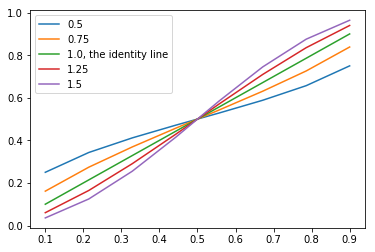

In [50]:
os = np.linspace(0.1,0.9, 8)
gammas = np.linspace(0.5, 1.5, 5)
vec_w = np.vectorize(w)

for gamma in gammas:
    if gamma == 1:
        plt.plot(os, vec_w(os, 1, gamma), label=str(gamma)+", the identity line")
    else:
        plt.plot(os, vec_w(os, 1, gamma), label=gamma)
plt.legend()
plt.show()

## Q6 (10 pts)

Laten we nu kijken hoe verschillende parameter waarden kunnen leiden tot verschillende keuzes. Laten we er voor gemak even van uit gaan dat de proefpersoon altijd simpelweg de optie kiest met de hoogste verwachtte uitkomst (geen softmax). Beschouw de volgende twee opties:

    A: 1% kans op 1000 euro, en anders niets 
    B: 50% kans op 20 euro, en anders niets

Vergelijk de uitkomsten voor de 4 mogelijke combinaties met $\alpha \in \{0.3, 1.5\}$ en $\gamma \in \{0.5, 1.0\}$ en vertel welke loterij verkozen wordt. 

# Model fitting

We gaan nu kijken naar de resultaten van een echt experiment. We hebben de data van een aantal proefpersoon die een heel aantal gambles gedaan heeft. In de data file kunnen we terugvinden welke van 2 opties zij gekozen hebben. We gaan kijken hoe goed CPT het gedrag van de proefpersonen kan voorspellen, en wat voor een parameter waardes dit oplevert. De data file die we zullen gebruiken is `data_LC5.txt`:

    Data Coding:
    Subject: is subject nr.
    p1,o1,p2,o2: p's and o's of gamble 1  (p is probability, o is outcome)
    p3,o3,p4,o4: p's and o's of gamble 2 
    decision: choice (1 = gamble 1, 2 = gamble 2)
   
Elke gamble wordt beschrijven, net als hierboven, door twee probabilities en twee outcomes. 
Schrijf een `CPT_fit` functie aan zodat je deze op de data van de proefpersonen kan fitten. 
We gaan voor het fitten van het model gebruik maken van [optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) en we gaan proberen Log Likelihood te maximaliseren.

In het databestand van de proefpersoon kunnen we zien welke van de 2 loterijen de proefpersoon koos. Wat we op elke trial willen weten is wat de waarschijnlijkheid is dat het model dezelfde keuze maakt als de proefpersoon. Hoe hoe groter die kans is hoe beter het model fit.

## Q7  (35 pts)

Schrijf de functie `CPT_fit`.
    
* Gegeven een set parameters $\alpha$, $\beta$, $\lambda$, $\gamma$ en $\theta$, bereken voor elk van de loterijen in het bestand:
    * De subjectieve waarde van de uitkomsten
    * De subjectieve waarschijnlijkheden
    * De subjectieve verwachte waarde voor een loterij
    * De (softmax) waarschijnlijkheid dat de eerste of de tweede loterij wordt gekozen
    * De waarschijnlijkheid die correspondeerd met de daadwerkelijk gemaakte keuze
* De som van de logaritme van deze waarschijnlijkheden geeft de Log Likelihood voor deze parameters.
* Vermenigvuldig dit resultaat nog met $-1$, gegegeven dat we dit willen maximaliseren ipv minimaliseren.

Gebruik als startwaarden $\alpha=0.5$, $\beta=0.5$, $\lambda=0.5$, $\gamma=0.5$ en $\theta=0.05$, en gebruik [Nelder-Mead](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead) als de methode voor de minimalisatie.

Welke parameterwaarden fitten de data van de proefpersonen het beste? 

Als we deze parameters voor waar aannemen, hoe kijken deze proefpersonen tegen winsten en verliezen aan? En hoe weegt deze persoon waarschijnlijkheden?


In [ ]:
def CPT_fit(params, data):
    alpha, beta, labda, gamma, theta = params
    
    # TODO


## Q8 (10 pts)

Fit nu dit model op je eigen data en rapporteer jouw parameter waarden, beschrijf net als bij Q7 wat voor een persoon jij bent. 